<a href="https://colab.research.google.com/github/BrandyTee/My-ML-Projects/blob/main/Supervised%20Learning/Diabetes_Prediction_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/datasets/diabetes.csv"
df = pd.read_csv(path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.shape

(768, 9)

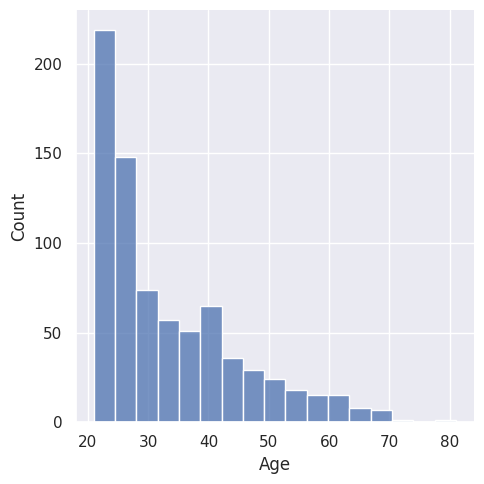

In [ ]:
#Exploratory Data Analysis
sns.set()
sns.displot(df["Age"])

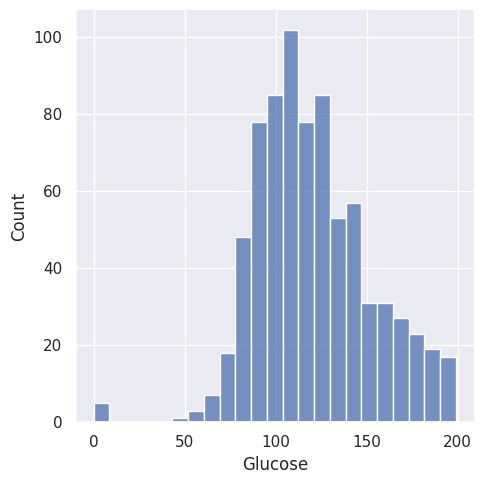

In [ ]:
sns.displot(df["Glucose"])

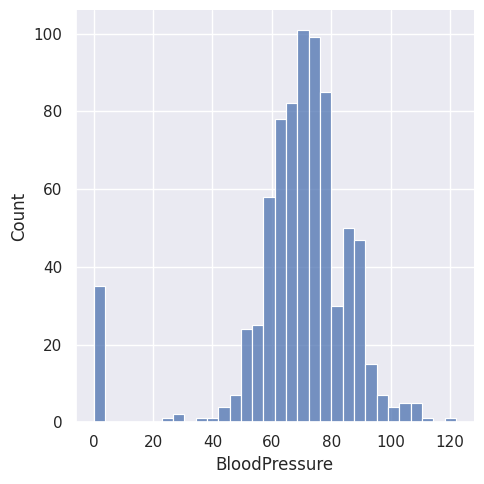

In [ ]:
sns.displot(df["BloodPressure"])

In [ ]:
#Separate our Data
X = df.iloc[:, :-1]
Y = df.iloc[:, -1:]

In [ ]:
#Do Some StandardScaling on our Data

scaler = StandardScaler()

X2 = scaler.fit_transform(X)

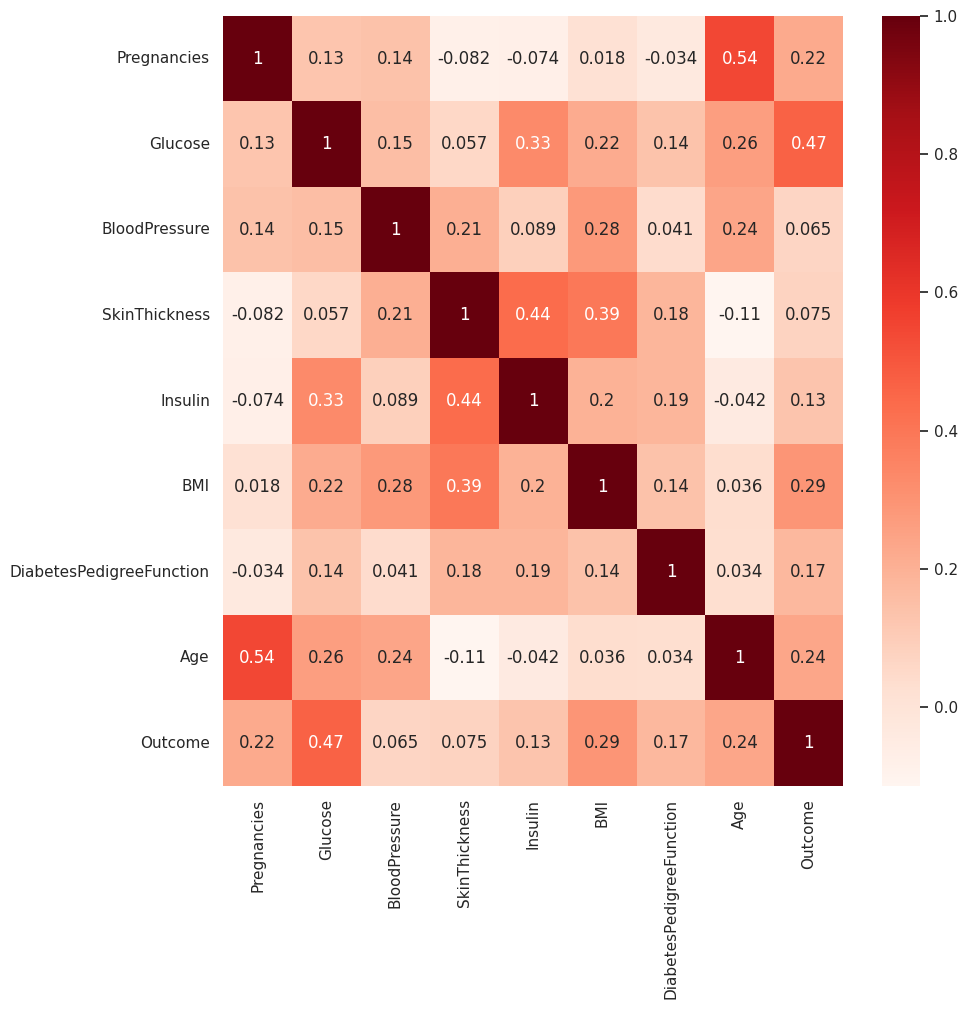

In [ ]:
#Do Corelation Matrix
corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.show()

In [ ]:
#Train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.15, random_state=10
)

In [ ]:
#Create Model Function
def model_function(model):
    model.fit(X_train, y_train)

    #Prediction
    pred = model.predict(X_test)
    train_pred = model.predict(X_train)

    train_accuracy = accuracy_score(y_train, train_pred)
    accuracy = accuracy_score(y_test, pred)
    matrix = confusion_matrix(y_test, pred)

    print("Train Accuracy: ", train_accuracy)
    print("Accuracy: ", accuracy)
    sns.heatmap(matrix, annot=True, cmap="Blues")

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train Accuracy:  1.0
Accuracy:  0.75


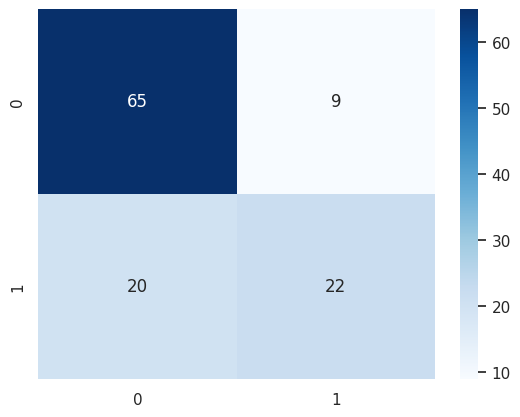

In [ ]:
forest = RandomForestClassifier(n_estimators=200)
model_function(forest)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy:  0.7745398773006135
Accuracy:  0.7758620689655172


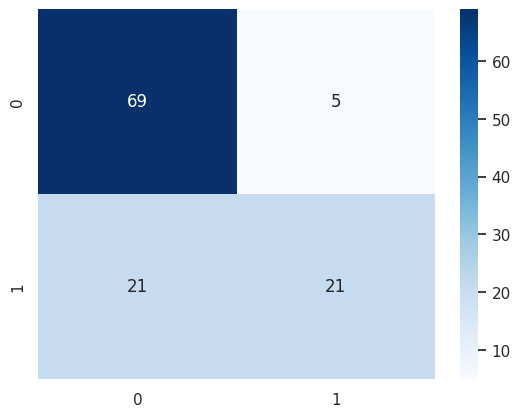

In [ ]:
logreg = LogisticRegression()
model_function(logreg)

Train Accuracy:  1.0
Accuracy:  0.7241379310344828


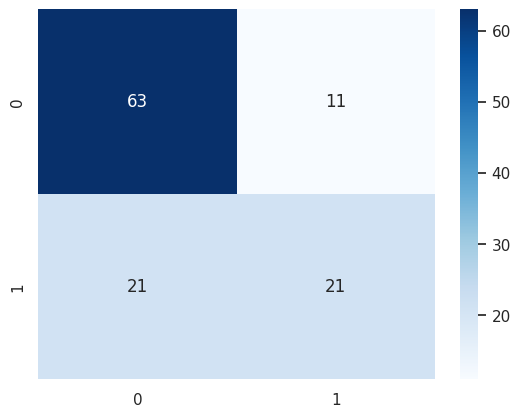

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
model_function(xgb)

Train Accuracy:  0.7745398773006135
Accuracy:  0.7241379310344828


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


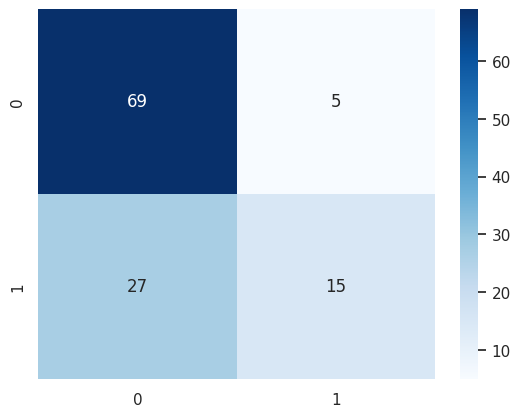

In [ ]:
from sklearn.svm import SVC

svc = SVC()
model_function(svc)

In [ ]:
joblib.dump(logreg, "diabetes_prediction_chatgpt.joblib")

['diabetes_prediction_chatgpt.joblib']